In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Keras
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import regularizers

# データの分割
from sklearn.model_selection import train_test_split

# 画像データの機械学習用
from sklearn import datasets

%matplotlib inline
pd.options.display.max_columns = None

In [2]:
digits = datasets.load_digits()

In [3]:
# 目的変数(Y)：target、説明変数(X)：data
Y = np.array(digits['target'])
X = np.array(digits['data'])
Y

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
# 形状の確認
print(Y.shape)
print(X.shape)

(1797,)
(1797, 64)


In [5]:
from tensorflow.keras.utils import to_categorical

Y = to_categorical(Y)

In [6]:
print(Y)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [7]:
print(Y.shape)
print(X.shape)

(1797, 10)
(1797, 64)


In [8]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
# データの分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [10]:
print('Y_train=', Y_train.shape, ', X_train=', X_train.shape)
print('Y_valid=', Y_valid.shape, ', X_valid=', X_valid.shape)
print('Y_test=', Y_test.shape, 'X_test=', X_test.shape)

Y_train= (879, 10) , X_train= (879, 64)
Y_valid= (378, 10) , X_valid= (378, 64)
Y_test= (540, 10) X_test= (540, 64)


In [11]:
# モデルの初期化
model = keras.Sequential()

# 入力層
model.add(Dense(16, activation='relu', input_shape=(64,)))
# 隠れ層
model.add(Dense(16, activation='relu'))
# 出力層
model.add(Dense(10, activation='softmax'))

# モデルの構築
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 1,482
Trainable params: 1,482
Non-trainable params: 0
_________________________________________________________________


In [13]:
%%time
# 学習の実施
log = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=True,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                         min_delta=0, patience=100,
                                                         verbose=1)],
                validation_data=(X_valid, Y_valid))

Train on 879 samples, validate on 378 samples
Epoch 1/5000
879/879 [==============================] - 1s 1ms/sample - loss: 4.0793 - accuracy: 0.1684 - val_loss: 2.7325 - val_accuracy: 0.2302
Epoch 2/5000
879/879 [==============================] - 0s 74us/sample - loss: 2.3738 - accuracy: 0.2673 - val_loss: 2.0160 - val_accuracy: 0.3254
Epoch 3/5000
879/879 [==============================] - 0s 73us/sample - loss: 1.8418 - accuracy: 0.3618 - val_loss: 1.6663 - val_accuracy: 0.4365
Epoch 4/5000
879/879 [==============================] - 0s 73us/sample - loss: 1.5357 - accuracy: 0.4892 - val_loss: 1.4357 - val_accuracy: 0.5053
Epoch 5/5000
879/879 [==============================] - 0s 72us/sample - loss: 1.2999 - accuracy: 0.5609 - val_loss: 1.2627 - val_accuracy: 0.6138
Epoch 6/5000
879/879 [==============================] - 0s 72us/sample - loss: 1.1092 - accuracy: 0.6371 - val_loss: 1.1101 - val_accuracy: 0.6455
Epoch 7/5000
879/879 [==============================] - 0s 75us/sample - 

Epoch 56/5000
879/879 [==============================] - 0s 74us/sample - loss: 0.0130 - accuracy: 0.9989 - val_loss: 0.2209 - val_accuracy: 0.9444
Epoch 57/5000
879/879 [==============================] - 0s 71us/sample - loss: 0.0118 - accuracy: 0.9989 - val_loss: 0.2396 - val_accuracy: 0.9444
Epoch 58/5000
879/879 [==============================] - 0s 71us/sample - loss: 0.0119 - accuracy: 0.9989 - val_loss: 0.2307 - val_accuracy: 0.9471
Epoch 59/5000
879/879 [==============================] - 0s 74us/sample - loss: 0.0097 - accuracy: 0.9989 - val_loss: 0.2213 - val_accuracy: 0.9418
Epoch 60/5000
879/879 [==============================] - 0s 72us/sample - loss: 0.0107 - accuracy: 0.9989 - val_loss: 0.2221 - val_accuracy: 0.9418
Epoch 61/5000
879/879 [==============================] - 0s 72us/sample - loss: 0.0085 - accuracy: 0.9989 - val_loss: 0.2340 - val_accuracy: 0.9392
Epoch 62/5000
879/879 [==============================] - 0s 71us/sample - loss: 0.0077 - accuracy: 1.0000 - val_

Epoch 110/5000
879/879 [==============================] - 0s 72us/sample - loss: 7.4603e-05 - accuracy: 1.0000 - val_loss: 0.3677 - val_accuracy: 0.9603
Epoch 111/5000
879/879 [==============================] - 0s 72us/sample - loss: 7.1705e-05 - accuracy: 1.0000 - val_loss: 0.3706 - val_accuracy: 0.9550
Epoch 112/5000
879/879 [==============================] - 0s 72us/sample - loss: 5.3308e-05 - accuracy: 1.0000 - val_loss: 0.3770 - val_accuracy: 0.9577
Epoch 113/5000
879/879 [==============================] - 0s 73us/sample - loss: 7.2349e-05 - accuracy: 1.0000 - val_loss: 0.3939 - val_accuracy: 0.9550
Epoch 114/5000
879/879 [==============================] - 0s 72us/sample - loss: 3.8633e-05 - accuracy: 1.0000 - val_loss: 0.4205 - val_accuracy: 0.9497
Epoch 115/5000
879/879 [==============================] - 0s 72us/sample - loss: 6.1130e-05 - accuracy: 1.0000 - val_loss: 0.4172 - val_accuracy: 0.9524
Epoch 116/5000
879/879 [==============================] - 0s 72us/sample - loss: 2

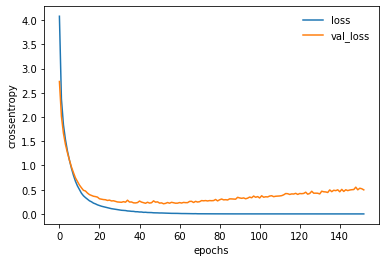

In [14]:
# グラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False)
plt.xlabel('epochs')
plt.ylabel('crossentropy')
plt.show()

In [15]:
Y_pred = model.predict_classes(X_test)

In [16]:
Y_test_ = np.argmax(Y_test, axis=1)

In [17]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_, Y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       0.89      0.94      0.92        52
           2       0.94      0.96      0.95        53
           3       0.93      0.93      0.93        54
           4       1.00      0.94      0.97        48
           5       0.96      0.88      0.92        57
           6       0.94      0.98      0.96        60
           7       0.95      0.98      0.96        53
           8       0.95      0.93      0.94        61
           9       0.95      0.93      0.94        57

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



In [18]:
input_shape=(8, 8, 1)

In [19]:
input_shape=(28, 28, 3,)

In [20]:
# 8x8の画像の形状にreshape
X2 = X.reshape(len(X), 8, 8, 1)

In [21]:
print(X2.shape)

(1797, 8, 8, 1)


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [23]:
print('Y_train=', Y_train.shape, ', X_train=', X_train.shape)
print('Y_valid=', Y_valid.shape, ', X_valid=', X_valid.shape)
print('Y_test=', Y_test.shape, ', X_test=', X_test.shape)

Y_train= (879, 10) , X_train= (879, 8, 8, 1)
Y_valid= (378, 10) , X_valid= (378, 8, 8, 1)
Y_test= (540, 10) , X_test= (540, 8, 8, 1)


In [24]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten

In [25]:
# モデルの初期化
model = keras.Sequential()

# 入力層
model.add(Conv2D(32, kernel_size=3, padding='same', strides=1,
                 input_shape=(8, 8, 1), activation='relu'))
model.add(Flatten())
# 隠れ層
model.add(Dense(16, activation='relu'))
# 出力層
model.add(Dense(10, activation='softmax'))

# モデルの構築
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 32)          320       
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                32784     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                170       
Total params: 33,274
Trainable params: 33,274
Non-trainable params: 0
_________________________________________________________________


In [27]:
%%time
log = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=True,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                         min_delta=0, patience=100,
                                                         verbose=1)],
                validation_data=(X_valid, Y_valid))

Train on 879 samples, validate on 378 samples
Epoch 1/5000
879/879 [==============================] - 1s 949us/sample - loss: 1.9315 - accuracy: 0.3936 - val_loss: 1.0744 - val_accuracy: 0.7116
Epoch 2/5000
879/879 [==============================] - 0s 120us/sample - loss: 0.8492 - accuracy: 0.7634 - val_loss: 0.6678 - val_accuracy: 0.8307
Epoch 3/5000
879/879 [==============================] - 0s 119us/sample - loss: 0.4911 - accuracy: 0.8646 - val_loss: 0.6256 - val_accuracy: 0.8016
Epoch 4/5000
879/879 [==============================] - 0s 119us/sample - loss: 0.3217 - accuracy: 0.9181 - val_loss: 0.3464 - val_accuracy: 0.8995
Epoch 5/5000
879/879 [==============================] - 0s 123us/sample - loss: 0.2179 - accuracy: 0.9420 - val_loss: 0.4900 - val_accuracy: 0.8519
Epoch 6/5000
879/879 [==============================] - 0s 121us/sample - loss: 0.1612 - accuracy: 0.9556 - val_loss: 0.2188 - val_accuracy: 0.9418
Epoch 7/5000
879/879 [==============================] - 0s 120us/s

879/879 [==============================] - 0s 120us/sample - loss: 3.7826e-06 - accuracy: 1.0000 - val_loss: 0.1334 - val_accuracy: 0.9709
Epoch 56/5000
879/879 [==============================] - 0s 119us/sample - loss: 0.0083 - accuracy: 0.9977 - val_loss: 0.2838 - val_accuracy: 0.9444
Epoch 57/5000
879/879 [==============================] - 0s 119us/sample - loss: 3.6604e-04 - accuracy: 1.0000 - val_loss: 0.1950 - val_accuracy: 0.9683
Epoch 58/5000
879/879 [==============================] - 0s 118us/sample - loss: 8.2656e-06 - accuracy: 1.0000 - val_loss: 0.1711 - val_accuracy: 0.9683
Epoch 59/5000
879/879 [==============================] - 0s 119us/sample - loss: 2.8190e-06 - accuracy: 1.0000 - val_loss: 0.1598 - val_accuracy: 0.9683
Epoch 60/5000
879/879 [==============================] - 0s 119us/sample - loss: 1.7932e-06 - accuracy: 1.0000 - val_loss: 0.1518 - val_accuracy: 0.9656
Epoch 61/5000
879/879 [==============================] - 0s 119us/sample - loss: 1.0900e-06 - accura

879/879 [==============================] - 0s 120us/sample - loss: 1.0850e-09 - accuracy: 1.0000 - val_loss: 0.1814 - val_accuracy: 0.9683
Epoch 109/5000
879/879 [==============================] - 0s 119us/sample - loss: 2.3055e-09 - accuracy: 1.0000 - val_loss: 0.1821 - val_accuracy: 0.9709
Epoch 110/5000
879/879 [==============================] - 0s 120us/sample - loss: 1.0850e-09 - accuracy: 1.0000 - val_loss: 0.1891 - val_accuracy: 0.9683
Epoch 111/5000
879/879 [==============================] - 0s 119us/sample - loss: 1.6274e-09 - accuracy: 1.0000 - val_loss: 0.1829 - val_accuracy: 0.9683
Epoch 112/5000
879/879 [==============================] - 0s 119us/sample - loss: 1.2206e-09 - accuracy: 1.0000 - val_loss: 0.1839 - val_accuracy: 0.9683
Epoch 113/5000
879/879 [==============================] - 0s 120us/sample - loss: 1.2206e-09 - accuracy: 1.0000 - val_loss: 0.1849 - val_accuracy: 0.9683
Epoch 114/5000
879/879 [==============================] - 0s 120us/sample - loss: 1.3562e-0

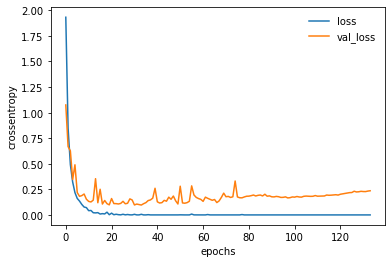

In [28]:
# グラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False)
plt.xlabel('epochs')
plt.ylabel('crossentropy')
plt.show()

In [29]:
Y_pred = model.predict_classes(X_test)

In [30]:
# カテゴリー変数の復元
Y_test_ = np.argmax(Y_test, axis=1)

In [31]:
# モデルの評価
from sklearn.metrics import classification_report

print(classification_report(Y_test_, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.93      0.98      0.95        52
           2       0.96      1.00      0.98        53
           3       0.96      0.96      0.96        54
           4       1.00      1.00      1.00        48
           5       1.00      0.96      0.98        57
           6       0.98      0.98      0.98        60
           7       1.00      1.00      1.00        53
           8       0.97      0.93      0.95        61
           9       0.95      0.93      0.94        57

    accuracy                           0.97       540
   macro avg       0.97      0.98      0.98       540
weighted avg       0.97      0.97      0.97       540



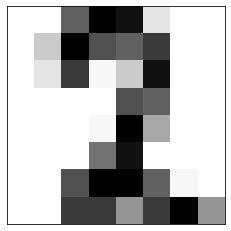

In [32]:
# テストデータの0番目を可視化
plt.imshow(X_test[0].reshape(8, 8), cmap='Greys')
plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.show()

In [33]:
np.argmax(Y_test[0])

2

In [34]:
# モデルの重み(パラメータ)の取得
w = model.get_weights()

In [35]:
w0 = w[0]

In [36]:
w0.shape

(3, 3, 1, 32)

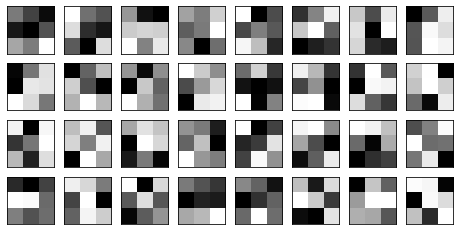

In [37]:
# Conv2D層のフィルタ可視化

# 4行8列にグラフを分割
fig, ax = plt.subplots(4, 8, figsize=(8, 4))

for i in range(4):
    for j in range(8):
        # zは左上から数得たグラフの描写位置
        z = i * 8 + j
        
        # 行=i、列=jの位置に画像を描写する
        ax[i, j].imshow(w0[:, :, :, z].reshape(3, 3), cmap='Greys')
        
        # 目盛を表示しない設定
        ax[i, j].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
        
plt.show()

In [38]:
from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers[:5]]

In [39]:
# 入力：モデルの入力、出力：Conv2Dの出力
activation_model = models.Model(inputs=model.input, outputs=layer_outputs[0])
activation_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 8, 8, 1)]         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 8, 8, 32)          320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [40]:
# 予測：Conv2Dの結果が出力される
activations = activation_model.predict(X_test[0:1])

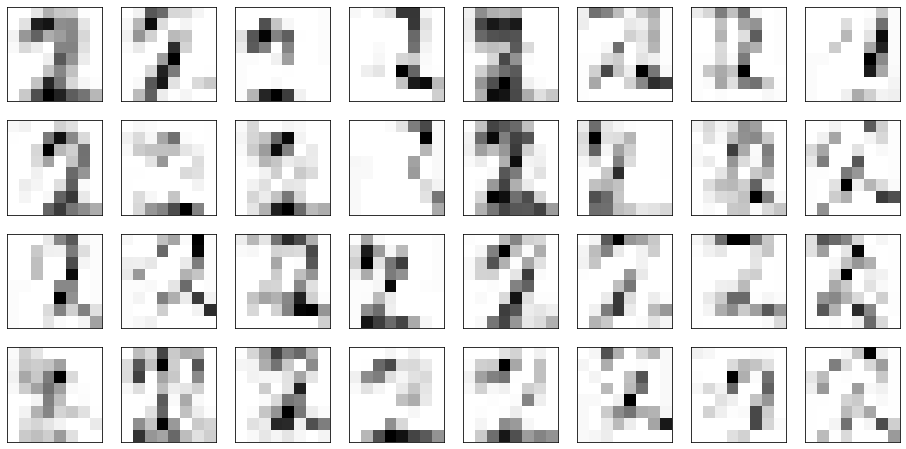

In [41]:
fig, ax = plt.subplots(4, 8, figsize=(16, 8))

for i in range(4):
    for j in range(8):
        z = i * 8 + j
        ax[i, j].imshow(activations[0, :, :, z], cmap='Greys')
        ax[i, j].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
        
plt.show()

In [42]:
# ライブラリのインポート
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [43]:
# モデルの初期化
model = keras.Sequential()

# 入力層
model.add(Conv2D(
    64, kernel_size=3, padding="same",
    input_shape=(8, 8, 1,), activation="relu"
))
# プーリング層
model.add(MaxPooling2D(pool_size=(2, 2)))
# ドロップアウト層
model.add(Dropout(0.25))

#　層のユニットの繰り返し
model.add(Conv2D(128, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

#　1次元に変換
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))) # 正則化
model.add(Dropout(0.5))

#　出力層
model.add(Dense(10, activation='softmax'))

#　モデルの構築
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 8, 64)          640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [45]:
%%time
log = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=True,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                         min_delta=0, patience=100,
                                                         verbose=1)],
                validation_data=(X_valid, Y_valid))

Train on 879 samples, validate on 378 samples
Epoch 1/5000
879/879 [==============================] - 2s 2ms/sample - loss: 2.7146 - accuracy: 0.1377 - val_loss: 2.2495 - val_accuracy: 0.3466
Epoch 2/5000
879/879 [==============================] - 1s 574us/sample - loss: 2.2449 - accuracy: 0.2378 - val_loss: 1.9232 - val_accuracy: 0.5159
Epoch 3/5000
879/879 [==============================] - 0s 549us/sample - loss: 1.8986 - accuracy: 0.3549 - val_loss: 1.3206 - val_accuracy: 0.7302
Epoch 4/5000
879/879 [==============================] - 0s 551us/sample - loss: 1.4673 - accuracy: 0.5347 - val_loss: 0.8103 - val_accuracy: 0.9101
Epoch 5/5000
879/879 [==============================] - 0s 555us/sample - loss: 1.1415 - accuracy: 0.6314 - val_loss: 0.5708 - val_accuracy: 0.9206
Epoch 6/5000
879/879 [==============================] - 0s 565us/sample - loss: 0.8924 - accuracy: 0.7327 - val_loss: 0.3539 - val_accuracy: 0.9444
Epoch 7/5000
879/879 [==============================] - 0s 550us/sam

Epoch 56/5000
879/879 [==============================] - 0s 546us/sample - loss: 0.0609 - accuracy: 0.9886 - val_loss: 0.0565 - val_accuracy: 0.9921
Epoch 57/5000
879/879 [==============================] - 0s 549us/sample - loss: 0.0649 - accuracy: 0.9852 - val_loss: 0.0395 - val_accuracy: 0.9947
Epoch 58/5000
879/879 [==============================] - 0s 548us/sample - loss: 0.0586 - accuracy: 0.9898 - val_loss: 0.0610 - val_accuracy: 0.9868
Epoch 59/5000
879/879 [==============================] - 0s 553us/sample - loss: 0.0543 - accuracy: 0.9898 - val_loss: 0.0533 - val_accuracy: 0.9868
Epoch 60/5000
879/879 [==============================] - 0s 551us/sample - loss: 0.0446 - accuracy: 0.9920 - val_loss: 0.0411 - val_accuracy: 0.9894
Epoch 61/5000
879/879 [==============================] - 0s 545us/sample - loss: 0.0718 - accuracy: 0.9829 - val_loss: 0.0384 - val_accuracy: 0.9894
Epoch 62/5000
879/879 [==============================] - 0s 541us/sample - loss: 0.0618 - accuracy: 0.9886

Epoch 111/5000
879/879 [==============================] - 0s 551us/sample - loss: 0.0206 - accuracy: 0.9977 - val_loss: 0.0267 - val_accuracy: 0.9894
Epoch 112/5000
879/879 [==============================] - 0s 556us/sample - loss: 0.0298 - accuracy: 0.9932 - val_loss: 0.0154 - val_accuracy: 0.9974
Epoch 113/5000
879/879 [==============================] - 0s 555us/sample - loss: 0.0229 - accuracy: 0.9966 - val_loss: 0.0195 - val_accuracy: 0.9974
Epoch 114/5000
879/879 [==============================] - 0s 543us/sample - loss: 0.0327 - accuracy: 0.9932 - val_loss: 0.0267 - val_accuracy: 0.9921
Epoch 115/5000
879/879 [==============================] - 0s 540us/sample - loss: 0.0180 - accuracy: 0.9977 - val_loss: 0.0383 - val_accuracy: 0.9921
Epoch 116/5000
879/879 [==============================] - 0s 546us/sample - loss: 0.0243 - accuracy: 0.9966 - val_loss: 0.0253 - val_accuracy: 0.9921
Epoch 117/5000
879/879 [==============================] - 0s 541us/sample - loss: 0.0220 - accuracy:

879/879 [==============================] - 0s 551us/sample - loss: 0.0322 - accuracy: 0.9886 - val_loss: 0.0242 - val_accuracy: 0.9974
Epoch 166/5000
879/879 [==============================] - 0s 552us/sample - loss: 0.0236 - accuracy: 0.9932 - val_loss: 0.0218 - val_accuracy: 0.9921
Epoch 167/5000
879/879 [==============================] - 0s 546us/sample - loss: 0.0212 - accuracy: 0.9954 - val_loss: 0.0333 - val_accuracy: 0.9894
Epoch 168/5000
879/879 [==============================] - 0s 565us/sample - loss: 0.0204 - accuracy: 0.9932 - val_loss: 0.0345 - val_accuracy: 0.9841
Epoch 169/5000
879/879 [==============================] - 0s 553us/sample - loss: 0.0219 - accuracy: 0.9932 - val_loss: 0.0175 - val_accuracy: 0.9947
Epoch 170/5000
879/879 [==============================] - 0s 556us/sample - loss: 0.0216 - accuracy: 0.9943 - val_loss: 0.0221 - val_accuracy: 0.9921
Epoch 171/5000
879/879 [==============================] - 0s 550us/sample - loss: 0.0207 - accuracy: 0.9920 - val_l

Epoch 220/5000
879/879 [==============================] - 2s 3ms/sample - loss: 0.0128 - accuracy: 0.9966 - val_loss: 0.0210 - val_accuracy: 0.9974
Epoch 221/5000
879/879 [==============================] - 0s 552us/sample - loss: 0.0278 - accuracy: 0.9943 - val_loss: 0.0173 - val_accuracy: 0.9921
Epoch 222/5000
879/879 [==============================] - 0s 568us/sample - loss: 0.0153 - accuracy: 0.9966 - val_loss: 0.0180 - val_accuracy: 0.9974
Epoch 223/5000
879/879 [==============================] - 0s 565us/sample - loss: 0.0300 - accuracy: 0.9954 - val_loss: 0.0206 - val_accuracy: 0.9947
Epoch 224/5000
879/879 [==============================] - 0s 562us/sample - loss: 0.0258 - accuracy: 0.9943 - val_loss: 0.0314 - val_accuracy: 0.9894
Epoch 225/5000
879/879 [==============================] - 0s 564us/sample - loss: 0.0206 - accuracy: 0.9966 - val_loss: 0.0281 - val_accuracy: 0.9947
Epoch 226/5000
879/879 [==============================] - 0s 556us/sample - loss: 0.0213 - accuracy: 0

Epoch 275/5000
879/879 [==============================] - 6s 7ms/sample - loss: 0.0149 - accuracy: 0.9989 - val_loss: 0.0285 - val_accuracy: 0.9921
Epoch 276/5000
879/879 [==============================] - 6s 7ms/sample - loss: 0.0266 - accuracy: 0.9920 - val_loss: 0.0196 - val_accuracy: 0.9921
Epoch 277/5000
879/879 [==============================] - 8s 9ms/sample - loss: 0.0202 - accuracy: 0.9932 - val_loss: 0.0245 - val_accuracy: 0.9947
Epoch 278/5000
879/879 [==============================] - 9s 10ms/sample - loss: 0.0211 - accuracy: 0.9920 - val_loss: 0.0149 - val_accuracy: 0.9974
Epoch 279/5000
879/879 [==============================] - 6s 7ms/sample - loss: 0.0137 - accuracy: 0.9966 - val_loss: 0.0287 - val_accuracy: 0.9894
Epoch 280/5000
879/879 [==============================] - 6s 7ms/sample - loss: 0.0238 - accuracy: 0.9932 - val_loss: 0.0331 - val_accuracy: 0.9921
Epoch 281/5000
879/879 [==============================] - 6s 7ms/sample - loss: 0.0126 - accuracy: 0.9977 - val

879/879 [==============================] - 6s 7ms/sample - loss: 0.0301 - accuracy: 0.9886 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 331/5000
879/879 [==============================] - 7s 7ms/sample - loss: 0.0126 - accuracy: 0.9966 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 332/5000
879/879 [==============================] - 9s 10ms/sample - loss: 0.0126 - accuracy: 0.9966 - val_loss: 0.0183 - val_accuracy: 0.9894
Epoch 333/5000
879/879 [==============================] - 6s 7ms/sample - loss: 0.0152 - accuracy: 0.9954 - val_loss: 0.0103 - val_accuracy: 0.9974
Epoch 334/5000
879/879 [==============================] - 6s 7ms/sample - loss: 0.0229 - accuracy: 0.9943 - val_loss: 0.0088 - val_accuracy: 0.9974
Epoch 335/5000
879/879 [==============================] - 6s 7ms/sample - loss: 0.0208 - accuracy: 0.9920 - val_loss: 0.0127 - val_accuracy: 0.9947
Epoch 336/5000
879/879 [==============================] - 6s 7ms/sample - loss: 0.0266 - accuracy: 0.9909 - val_loss: 0.0294 -

879/879 [==============================] - 0s 546us/sample - loss: 0.0211 - accuracy: 0.9932 - val_loss: 0.0214 - val_accuracy: 0.9921
Epoch 386/5000
879/879 [==============================] - 0s 547us/sample - loss: 0.0110 - accuracy: 0.9966 - val_loss: 0.0181 - val_accuracy: 0.9921
Epoch 387/5000
879/879 [==============================] - 0s 547us/sample - loss: 0.0197 - accuracy: 0.9943 - val_loss: 0.0191 - val_accuracy: 0.9947
Epoch 388/5000
879/879 [==============================] - 0s 547us/sample - loss: 0.0417 - accuracy: 0.9932 - val_loss: 0.0159 - val_accuracy: 0.9921
Epoch 389/5000
879/879 [==============================] - 0s 549us/sample - loss: 0.0222 - accuracy: 0.9954 - val_loss: 0.0195 - val_accuracy: 0.9894
Epoch 390/5000
879/879 [==============================] - 0s 546us/sample - loss: 0.0130 - accuracy: 0.9966 - val_loss: 0.0327 - val_accuracy: 0.9894
Epoch 391/5000
879/879 [==============================] - 0s 547us/sample - loss: 0.0186 - accuracy: 0.9932 - val_l

In [46]:
Y_pred = model.predict_classes(X_test)

In [47]:
Y_test_ = np.argmax(Y_test, axis=1)

In [48]:
# モデルの評価
from sklearn.metrics import classification_report

print(classification_report(Y_test_, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        52
           2       1.00      0.98      0.99        53
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        48
           5       1.00      0.98      0.99        57
           6       1.00      1.00      1.00        60
           7       1.00      1.00      1.00        53
           8       1.00      1.00      1.00        61
           9       0.98      1.00      0.99        57

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540



In [49]:
model.save('./my_model.h5')

In [50]:
from tensorflow.keras.models import load_model

# モデルの読込
model2 = load_model('./my_model.h5')

In [51]:
Y_pred = model2.predict_classes(X_test)

# モデルの評価
print(classification_report(Y_test_, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        52
           2       1.00      0.98      0.99        53
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        48
           5       1.00      0.98      0.99        57
           6       1.00      1.00      1.00        60
           7       1.00      1.00      1.00        53
           8       1.00      1.00      1.00        61
           9       0.98      1.00      0.99        57

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540



In [52]:
# 必要なモジュールの読込
from PIL import Image

In [53]:
# 画像データの読込
image = Image.open('./img2.png')
# グレースケールに変換
image = image.convert('L')
# 表示
image

In [57]:
# numpy配列に変換
image_data = np.asarray(image, dtype=np.float64)
# ネガポジ反転
image_data = 255 - image_data
# reshape
image_data = image_data.reshape(1, 8, 8, 1)

In [58]:
Y_pred = model2.predict_classes(image_data)
print(Y_pred)

[2]
